# Universidad de Buenos Aires
# Deep Learning - Examen
# Octubre 2023



El examen comienza al momento de recibir este correo y la ventana de entrega estará abierta hasta el Lunes 23 de Octubre a las 20:00hs. Toda comunicación con otros alumnos respecto del examen y la resolución de los ejercicios, queda estrictamente prohibida. Los exámenes serán comparados desde el punto de vista de la redacción, de los resultados y del código para determinar que el trabajo fue 100% individual y único. El examen es a libro abierto, pudiendo utilizar los contenidos vistos en clase y otra bibliografía. Todas las soluciones deben ser originales y si se toman ideas de fuentes externas deben ser correctamente citas incluyendo el correspondiente link o página de libro.

El formato de entrega debe ser un “link a un colab” (compartir a las siguientes direcciones: maxit1992@gmail.com y lelectronfou@gmail.com ) o un “link a un notebook en un github público”.

**Consideraciones a tener en cuenta:**
- Se entregará 1 solo colab para la totalidad del examen.
- Renombrar el archivo de la siguiente manera: **APELLIDO-NOMBRE-DL-Examen OCTUBRE 2023.ipynb**
- Los códigos deben poder ejecutarse.
- Los resultados, cómo el código y las explicaciones deben quedar guardados y visualizables en el correspondiente link.
- Prestar atención a las consignas, responder las preguntas cuando corresponda.



## Ejercicio 1



Dado el grafo de cómputo de la siguiente imagen:

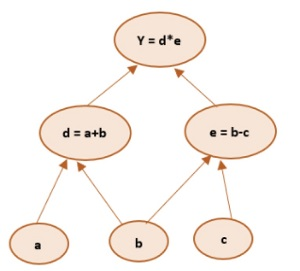

Donde a=1, b=2 y c=3

1. Realizar el paso forward y calcular Y.

2. Realizar el paso backward y calcular el backpropagation para a,b y c:
  
    a. En forma analítica (dy/dx = 0)
  
    b. Aplicando regla de la cadena

    c. Utilizando pytorch

3. Comparar los resultados del punto 2

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np


 #### Calculo Y con el paso fordward

In [ ]:
a=1
b=2
c=3
d=a+b
e=b-c
y=d*e
print(y)

-3


 #### a) Calculo backpropagation en forma analítica

y=d * e

y= (a+b)*(b-c)

y= a * b - a * c + b**2 - b * c

dy/da = b-c = 2-3 = -1

dy/db = a + 2b -c = 1 + 2 * 2 -3 = 2

dy/dc= -a-b= -1-2 = -3

 #### b) Calculo backpropagation aplicando regla de la cadena

dy/da=dy/dy * dy/dd * d/da = 1 * e * 1 = e

dy/da = e = b-c = -1

dy/db=dy/dy * dy/dd * dd/db + dy/dy * dy/de * de/db = 1 * e * 1 + 1 * d * 1 = e+d

dy/db = e+d = b-c + a+b = a+2*b-c = 2

dy/dc=dy/dy * dy/de * de/dc = 1 * d - 1 = -d

dy/dc = -d = -b-a = -3


 #### c) Calculo backpropagation con pytorch

In [125]:
a = torch.tensor(1.0, requires_grad=True)
b = torch.tensor(2.0, requires_grad=True)
c = torch.tensor(3.0, requires_grad=True)

# Definir las operaciones
d = a + b
e = b - c
Y = d * e

Y.backward()

gradiente_a = a.grad
gradiente_b = b.grad
gradiente_c = c.grad

print("Gradiente de a:", gradiente_a)
print("Gradiente de b:", gradiente_b)
print("Gradiente de c:", gradiente_c)

Gradiente de a: tensor(-1.)
Gradiente de b: tensor(2.)
Gradiente de c: tensor(-3.)


**Obs. Los resultados obtenidos son los mismos por los 3 caminos de cálculo.**

## Ejercicio 2



a) Implemente un modelo de red recurrente con la arquitectura presentada en la imagen. La misma debe tener:


* Como input una señal de 4 canales (4 features)
* 3 capas ocultas con 20 neuronas.
* Tenga como salida una señal de 2 canales (2 features) de igual longitud que la señal de entrada. (ayuda! emplee 2 capas recurrentes independientes)


b) Testeear el modelo con una señal random de longitud 20.

c) Indique el total de parámetros entrenables.



![c](https://drive.google.com/uc?export=view&id=1jDMr1hOiHBgkDZepHfOaxWQcaNNntB7W)



Imagen 3 link (https://drive.google.com/file/d/1jDMr1hOiHBgkDZepHfOaxWQcaNNntB7W/view?usp=drive_link)



 #### a) Implementación de RNN de 3 capas de 20 neuronas.

In [155]:
class examenRNN(nn.Module):
    def __init__(self):
        super(examenRNN,self).__init__()

        #Defino los parámetros del enunciado
        input_size = 4
        hidden_size = 20
        output_size = 2
        layers = 1 #Se define por cada capa ya que hay dos independientes
        self.hidden_size = hidden_size

        #Defino las capas ocultas
        self.rnn_1 = nn.RNN(input_size,hidden_size,layers,batch_first=True)

        self.rnn_2 = nn.RNN(input_size,hidden_size,layers,batch_first=True)

        self.rnn_3 = nn.RNN(hidden_size,hidden_size,layers,batch_first=True) #Esta capa es la dependiente dado que input_size = hidden_size

        # Capa lineal de salida
        self.fc = nn.Linear(hidden_size, output_size)


    def forward(self,x):

        #Inicializo las capas ocultas con ceros
        h1 = torch.zeros(1, 1, self.hidden_size)
        h2 = torch.zeros(1, 1, self.hidden_size)
        h3 = torch.zeros(1, 1, self.hidden_size)

        out1, h1 = self.rnn_1(x, h1)

        out2, h2 = self.rnn_2(x, h2)

        intermediate_output = out1 + out2

        out3, h3 = self.rnn_3(intermediate_output, h3)

        output = self.fc(out3)

        return output, h1, h2, h3

 #### b) Prueba con señal random de longitud 20

In [156]:
#Defino la señal random con numpy
señal_random = torch.randn(1,20, 4) #Batch, longitud,canales

#Genero una instancia del objeto examen RNN
RNN= examenRNN()

output, h1, h2, h3 = RNN(señal_random)
print(output)

tensor([[[-0.2794, -0.1290],
         [-0.1429, -0.0468],
         [-0.1590, -0.2007],
         [-0.1588, -0.0665],
         [-0.1035, -0.0272],
         [-0.1969, -0.0563],
         [-0.3187, -0.2583],
         [-0.1843, -0.4689],
         [-0.3071, -0.2378],
         [-0.2285, -0.2644],
         [-0.2767, -0.1517],
         [-0.2921, -0.3333],
         [-0.2668, -0.5643],
         [-0.2394, -0.4309],
         [-0.2160, -0.2128],
         [-0.3198, -0.1714],
         [-0.2860, -0.2362],
         [-0.2761, -0.1619],
         [-0.2525, -0.0855],
         [-0.2394, -0.0381]]], grad_fn=<ViewBackward0>)


**Obs. Se obtiene como se esperaba una salida de dos canales e igual longitud que la entrada(20).**

 #### c) Cantidad de parámetros entrenables del modelo

In [157]:
def imp_param(model):
  print('-'*84)
  print('PARAMETROS DEL MODELO')
  print('-'*84)
  for name, param in model.named_parameters():
    if param.requires_grad:
      print('Nombre del parámetro: ')
      print(name)
      print('Tamaño del parámetro: ')
      print(param.data.shape)
      print()
imp_param(RNN)

------------------------------------------------------------------------------------
PARAMETROS DEL MODELO
------------------------------------------------------------------------------------
Nombre del parámetro: 
rnn_1.weight_ih_l0
Tamaño del parámetro: 
torch.Size([20, 4])

Nombre del parámetro: 
rnn_1.weight_hh_l0
Tamaño del parámetro: 
torch.Size([20, 20])

Nombre del parámetro: 
rnn_1.bias_ih_l0
Tamaño del parámetro: 
torch.Size([20])

Nombre del parámetro: 
rnn_1.bias_hh_l0
Tamaño del parámetro: 
torch.Size([20])

Nombre del parámetro: 
rnn_2.weight_ih_l0
Tamaño del parámetro: 
torch.Size([20, 4])

Nombre del parámetro: 
rnn_2.weight_hh_l0
Tamaño del parámetro: 
torch.Size([20, 20])

Nombre del parámetro: 
rnn_2.bias_ih_l0
Tamaño del parámetro: 
torch.Size([20])

Nombre del parámetro: 
rnn_2.bias_hh_l0
Tamaño del parámetro: 
torch.Size([20])

Nombre del parámetro: 
rnn_3.weight_ih_l0
Tamaño del parámetro: 
torch.Size([20, 20])

Nombre del parámetro: 
rnn_3.weight_hh_l0
Tamaño de

In [158]:
total_params = sum(p.numel() for p in RNN.parameters() if p.requires_grad)
print("Número total de parámetros entrenables:", total_params)

Número total de parámetros entrenables: 1922


## Ejercicio 3

Se desea construir un sistema de recomendación de películas. Para esto se cuenta con un dataset de las puntuaciones que los usuarios han asignado a las peliculas disponibles.

Link dataset: https://drive.google.com/file/d/1Og9H-8oqb3_Wo_WOakeAuRR_mwr922Ar/view?usp=sharing

Para verificar la factibilidad del proyecto con datos válidos, se decide utilizar solamente las 200 películas con más votos y los usuarios que han puntuado al menos 100 películas.

1- Analizar el dataset para utilizar solamente las 200 películas con mayor cantidad de votos y los usuarios que hayan votado al menos 100 películas.

2- A partir del dataset del punto 1, construir una única red neuronal que utilice una capa de embeddings para el id de usuario, una capa de embeddings para el id de película y al menos dos capas lineales que sea capaz de predecir el puntaje que cada usuario colocó a cada pelicula.

3- Elegir un usuario al azar, una película que dicho usuario haya puntuado y verificar la predicción del modelo. Comparar con el puntaje real que el usuario asignó a dicha película.

4- Realizar una recomendación de película para el usuario del punto 3 utilizando los embeddings de usuario o los embeddings de películas. Comprobar si la recomendación es correcta haciendo una predicción del puntuaje con la red neuronal.


 #### 3.1 Utilizar solamente las 200 películas con mayor cantidad de votos y los usuarios que hayan votado al menos 100 películas.

In [31]:
import pandas as pd
import numpy as np
from torch.utils.data import Dataset,DataLoader
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
import random


In [3]:
from google.colab import drive
drive.mount('/content/drive')

file = '/content/drive/My Drive/ratings.csv'
df=pd.read_csv(file)
core_movies = df.groupby("movieId")["rating"].count().reset_index()
core_movies = core_movies.sort_values(by="rating", ascending=False).head(200)

Mounted at /content/drive


In [5]:
core_users = df.groupby("userId")["movieId"].count().reset_index()
core_users =core_users[core_users["movieId"]>=100]

In [6]:
df_final = df[df["movieId"].isin(core_movies['movieId'])]
df_final = df_final[df_final["userId"].isin(core_users['userId'])]
df_final

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931
7,1,110,4.0,964982176
...,...,...,...,...
100326,610,60069,4.5,1493844866
100371,610,68157,5.0,1493845023
100380,610,68954,3.5,1493844881
100417,610,72998,4.5,1479544106


 #### 3.2 Construir una única red neuronal que utilice una capa de embeddings para el id de usuario, una capa de embeddings para el id de película y al menos dos capas lineales que sea capaz de predecir el puntaje que cada usuario colocó a cada pelicula.

In [7]:
#Establezco mi dataset
x = df_final.drop(['rating','timestamp'],axis=1).to_numpy()
y = df_final['rating'].to_numpy()

In [8]:
#Normalizo para acelerar el entrenamiento
x_min = np.min(x,axis=0)
x_max = np.max(x,axis=0)
x_norm = (x-x_min)/(x_max-x_min)

In [9]:
#Divido en train/valid
np.random.seed(53)
idx = np.random.permutation(x_norm.shape[0])
train_idx = idx[:int(0.8*x_norm.shape[0])]
valid_idx = idx[int(0.8*x_norm.shape[0]):]

train_x = x_norm[train_idx]
train_y = y[train_idx]

valid_x = x_norm[valid_idx]
valid_y = y[valid_idx]

n_train = len(train_x)


In [10]:
#Defino los mapeos para embedding de usuario
userId = df_final['userId']
user_id_to_idx = {value: i for i, value in enumerate(userId.unique())}
user_idx = np.array([user_id_to_idx[value] for value in userId])

In [11]:
#Defino los mapeos para embedding de movie
movieId = df_final['movieId']
movie_id_to_idx = {value: i for i, value in enumerate(movieId.unique())}
movie_idx = np.array([movie_id_to_idx[value] for value in movieId])


In [12]:
#Divido en train y valid
user_idx_train = user_idx[train_idx]
user_idx_valid = user_idx[valid_idx]

movie_idx_train = movie_idx[train_idx]
movie_idx_valid = movie_idx[valid_idx]

In [14]:
class MyDataset(Dataset):
    def __init__(self,x,user_idx,movie_idx,y):
        self.x=x
        self.user_idx=user_idx
        self.movie_idx=movie_idx
        self.y=y

    def __len__(self):
        return self.x.shape[0]

    def __getitem__(self,idx):
        return self.x[idx],self.user_idx[idx],self.movie_idx[idx],self.y[idx]

In [15]:
train_ds = MyDataset(train_x,user_idx_train,movie_idx_train,train_y)

valid_ds = MyDataset(valid_x,user_idx_valid,movie_idx_valid,valid_y)

train_dataloader = DataLoader(train_ds,batch_size=64,shuffle=True)

valid_dataloader = DataLoader(valid_ds,batch_size=64)

In [18]:
#Arquitectura de la red neuronal con embeddings

class NNet(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.embedding_user = torch.nn.Embedding(num_embeddings=len(userId.unique()), embedding_dim=32)
        self.embedding_movie = torch.nn.Embedding(num_embeddings=len(movieId.unique()), embedding_dim=32)

        #Capa independiente 1
        self.linear1 = torch.nn.Linear(in_features=32, out_features=200, bias=True)
        #self.dropout1 = nn.Dropout(0.2)
        self.Tanh1 = torch.nn.Tanh()

        #Capa independiente 2
        self.linear2 = torch.nn.Linear(in_features=32, out_features=200, bias=True)
        self.Tanh2 = torch.nn.Tanh()

        #Capa 3 que recibe la combinación de las salidas anteriores

        self.linear3 = torch.nn.Linear(in_features=200, out_features=100 , bias=True)
        self.Tanh3 = torch.nn.Tanh()

        #Capa de salida
        self.output = torch.nn.Linear(in_features=100, out_features=1)

        # Inicializo optimizador con parámetros de inicio
        self.optimizer = optim.AdamW(self.parameters(), lr =0.005257, weight_decay=0.01098)


    def forward(self,x,user_idx, movie_idx):
          #Salida de los embedding
          output_embedding_user = self.embedding_user(user_idx).to(dtype=torch.float32)
          output_embedding_movie = self.embedding_movie(movie_idx).to(dtype=torch.float32)


          #Concatenación embeddings y x
          #combined_output_user = torch.cat([x,output_embedding_user], dim=1)
          #combined_output_movie = torch.cat([x,output_embedding_movie], dim=1)

          a = self.linear1(output_embedding_user)
          out1 = self.Tanh1(a)

          b = self.linear2(output_embedding_movie)
          out2 = self.Tanh2(b)


          combined_out = (out2*out1)
          c = self.linear3(combined_out)
          c = self.Tanh3(c)
          c = self.output(c)
          return c


In [19]:
#Defino R2 como métrica para usar luego
class RSquaredLoss(torch.nn.Module):
    def forward(self, y_pred, y_true):
        ssr = torch.sum((y_true - y_pred) ** 2)
        mean = torch.mean(y_true)
        sst = torch.sum((y_true - mean) ** 2)
        r_squared = 1 - (ssr / sst)
        return r_squared

RR = RSquaredLoss()

In [20]:
#Defino función de entrenamiento con los hiperparámetros seleccionados previamente usando Optuna y con muchas prueba manuales

nnet=NNet()

def final_train(nnet,lr,weight_decay,epochs):

    #Defino función de pérdida
    loss_function = torch.nn.MSELoss()

    #Defino optimizador
    optimizer = optim.AdamW(nnet.parameters(),lr=lr ,weight_decay = weight_decay)

    #Entrenamiento
    epochs = epochs

    train_loss_by_epoch = []
    valid_loss_by_epoch = []


    loss_train_values = []
    R2_train_values=[]
    R2_valid_values = []

    for epoch in range(epochs):
        nnet.train(True)
        epoch_loss = 0.0
        epoch_y = []
        epoch_y_hat = []

        for i,data in enumerate (train_dataloader):
            x_batch, user_idx_batch,movie_idx_batch,y_batch = data
            user_idx_batch = user_idx_batch.int()
            movie_idx_batch = movie_idx_batch.int()
            x_batch=x_batch.float()
            y_batch = y_batch.float()
            y_batch = y_batch.reshape(-1,1)


            #Paso fordward
            optimizer.zero_grad()
            y_pred = nnet(x_batch,user_idx_batch,movie_idx_batch)
            y_pred = y_pred.float()


            #Función de pérdida
            loss = loss_function(y_pred,y_batch)

            #Backpropagation
            loss.backward()

            #Actualizo parámetros
            optimizer.step()


        #Guardo los valores de y real e y predicha
        epoch_y += list(y_batch.detach().numpy())
        epoch_y_hat += list(y_pred.detach().numpy())

        #Calculo la pérdida total por época
        epoch_loss = epoch_loss + loss.item()


        #Guardo las medias de cada epoch_loss
        train_loss_by_epoch.append(epoch_loss)
        coef_corr_train = RR(y_pred,y_batch)
        R2_train_values.append(coef_corr_train.item())

    #########################################################

        #Validación del modelo
        nnet.train(False)
        #Defino función de pérdida
        #loss_function = torch.nn.MSELoss()

        #Defino optimizador
        #optimizer = optim.Adam(nnet.parameters(),lr=0.09,weight_decay=0.01)

        #Entrenamiento

        valid_loss_by_epoch = []
        loss_valid_values = []


        valid_epoch_loss = 0.0

        for i,data in enumerate(valid_dataloader):
            x_batch, user_idx_batch,movie_idx_batch,y_batch = data
            user_idx_batch = user_idx_batch.int()
            movie_idx_batch = movie_idx_batch.int()
            x_batch = x_batch.float()
            y_batch = y_batch.float()
            y_batch = y_batch.reshape(-1,1)


            #Paso fordward
            #optimizer.zero_grad()
            y_pred_valid = nnet(x_batch,user_idx_batch,movie_idx_batch)
            y_pred_valid = y_pred_valid.float()


            #Función de pérdida
            valid_loss = loss_function(y_pred_valid,y_batch)

            #Backpropagation
            #loss.backward()

            #Actualizo parámetros
            #optimizer.step()


            #Guardo los valores de y real e y predicha
            epoch_y += list(y_batch.detach().numpy())
            epoch_y_hat += list(y_pred_valid.detach().numpy())

            #Calculo la pérdida total por época
            valid_epoch_loss = valid_epoch_loss + valid_loss.item()


        #Guardo las medias de cada epoch_loss
        valid_loss_by_epoch.append(valid_epoch_loss)
        coef_corr_valid = RR(y_pred_valid,y_batch)
        R2_valid_values.append(coef_corr_valid.item())


        print(f"Epoch {epoch+1}: Train Loss/Valid Loss: {loss.item():.3f} / {valid_loss.item():.3f} , R2_train/R2_valid: {coef_corr_train.item():.3f} / {coef_corr_valid.item():.3f}")

    epochs_list = list(range(1, epochs + 1))
    #R2_train_values = [value.detach().numpy() for value in R2_train_values]

    #Grafico resultados del entrenamiento definitivo

    epochs_list = list(range(1, epochs + 1))
    #R2_train_values = [value.detach().numpy() for value in R2_train_values]

    plt.figure(figsize=(8,6))
    plt.plot(epochs_list, R2_train_values, marker='.', linestyle='-',color='g',lw=3,label= 'R2 train')
    plt.plot(epochs_list, R2_valid_values, marker='.', linestyle='-',color='r',lw=3,label= 'R2 valid')
    plt.xlabel('Épocas')
    plt.ylabel('R2_train_values')
    plt.ylim(-2, 1)
    plt.grid(True)
    plt.legend()
    plt.title('R2 vs épocas')
    plt.show()

    return print('Entrenamiento finalizado')

Epoch 1: Train Loss/Valid Loss: 1.042 / 1.511 , R2_train/R2_valid: -0.187 / 0.033
Epoch 2: Train Loss/Valid Loss: 0.610 / 0.967 , R2_train/R2_valid: 0.253 / 0.381
Epoch 3: Train Loss/Valid Loss: 1.190 / 0.628 , R2_train/R2_valid: 0.029 / 0.598
Epoch 4: Train Loss/Valid Loss: 0.534 / 0.820 , R2_train/R2_valid: 0.210 / 0.475
Epoch 5: Train Loss/Valid Loss: 1.339 / 0.584 , R2_train/R2_valid: 0.190 / 0.626
Epoch 6: Train Loss/Valid Loss: 0.371 / 0.552 , R2_train/R2_valid: 0.367 / 0.647
Epoch 7: Train Loss/Valid Loss: 0.481 / 0.499 , R2_train/R2_valid: 0.259 / 0.681
Epoch 8: Train Loss/Valid Loss: 0.368 / 0.561 , R2_train/R2_valid: 0.565 / 0.641
Epoch 9: Train Loss/Valid Loss: 0.674 / 0.572 , R2_train/R2_valid: 0.365 / 0.634
Epoch 10: Train Loss/Valid Loss: 0.784 / 0.737 , R2_train/R2_valid: -0.016 / 0.528
Epoch 11: Train Loss/Valid Loss: 0.759 / 0.584 , R2_train/R2_valid: 0.323 / 0.626
Epoch 12: Train Loss/Valid Loss: 0.399 / 0.621 , R2_train/R2_valid: 0.570 / 0.603
Epoch 13: Train Loss/Va

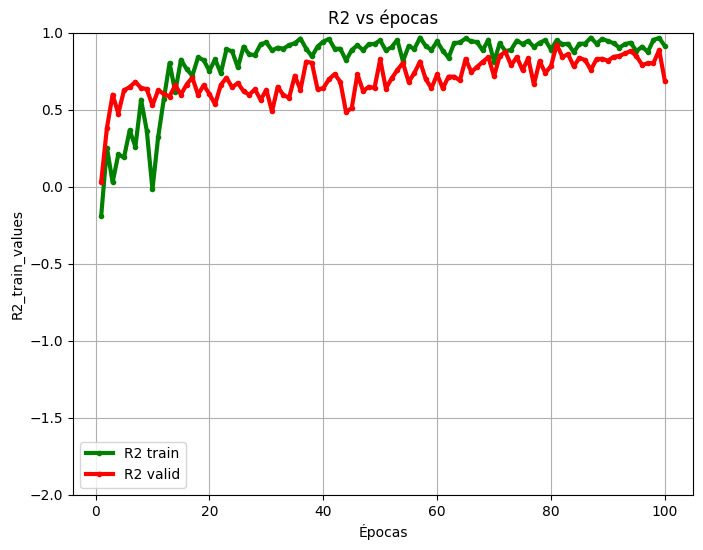

Entrenamiento finalizado


In [21]:
#Realizo el entrenamiento de la red neuronal con la red nnet, learning_rate = 0.0055147 y weight_decay = 0.001103
nnet_train = final_train(nnet,0.0055147,0.01103,100)

**Obs. Se observa un ligero overfitting dado que la métrica de entrenamiento está por encima de la de validación.**

In [27]:
#Guardo los parámetros del entrenamiento
trained_model = nnet.state_dict()

#En caso de requerirlo puedo usar estos parámetros
#nnet.load_state_dict(modelo_entrenado)

**3- Elegir un usuario al azar, una película que dicho usuario haya puntuado y verificar la predicción del modelo. Comparar con el puntaje real que el usuario asignó a dicha película.**

In [117]:
#Defino una función para efectuar predicciones
def predict(userId,movieId):
    #Mapeo el userId a useridx
    user_idx = torch.tensor([user_id_to_idx[userId]])
    #Mapeo la movieId a movieidx
    movie_idx = torch.tensor([movie_id_to_idx[movieId]])

    #Defino el tensor que va a pasar por la red neuronal
    x = torch.tensor([userId, movieId], dtype=torch.float32)

    #Aplico la normalización
    x_norm = (x-x_min)/(x_max-x_min)
    x_norm = x_norm.unsqueeze(0)
    x_norm = x_norm.to(dtype=torch.float32)
    nnet.eval()
    with torch.no_grad():
      rating = nnet(x_norm, user_idx, movie_idx)
      prediction = rating.item()
      #Aplico redondeo dado que los ratings van de 0.5 en 0.5
      rating = (round(prediction*2))/2
    return rating


In [149]:
#Lista de películas únicas
movies = df_final['movieId'].unique()

#Lista de usuarios únicos
users =df_final['userId'].unique()

#Selecciono un usuario al azar
random_user = random.choice(users)

random_user_movies = df_final[df_final['userId']==random_user]
random_user_movies = random_user_movies.drop(['userId','rating','timestamp'],axis=1).to_numpy()
random_movie = random.choice(random_user_movies)[0]

print(f'El userId es: {random_user} y la moveId es:{random_movie}')

El userId es: 314 y la moveId es:6


In [150]:
#Ahora realizo la predicción
prediction = predict(random_user,random_movie)

#Ahora busco el rating real del random_user sobre la random_movie
filter = (df_final['userId']==random_user)&(df_final['movieId']==random_movie)
real_rating = df_final[filter].iloc[0,2]

#Comparo
print(f'El rating predicho es {prediction} y el rating real fue de {real_rating}')


El rating predicho es 2.5 y el rating real fue de 3.0


**4- Realizar una recomendación de película para el usuario del punto 3 utilizando los embeddings de usuario o los embeddings de películas. Comprobar si la recomendación es correcta haciendo una predicción del puntuaje con la red neuronal**

In [152]:
#Defino una función para recomendar basado en similaridad de embeddings
def recommendation(userId):
    #MApeo el userId a idx
    user_idx = torch.tensor([user_id_to_idx[userId]])

    #Calculo el embedding
    user_embedding = nnet.embedding_user(user_idx)

    #Aplico métrica de similitud para calcular tensor con películas afines al userId
    similarity_scores = torch.nn.functional.cosine_similarity(user_embedding, nnet.embedding_movie.weight, dim=1)

    #Ordeno los tensores
    sorted_indices = torch.argsort(similarity_scores, descending=True)
    num_recommendations = 1
    recommended_movie_indices = sorted_indices[:num_recommendations]

    #Mapeo de idx a id
    movie_idx = recommended_movie_indices.item()
    movie_id = next((key for key, value in movie_id_to_idx.items() if value == movie_idx), None)
    return movie_id


In [154]:
#Calculo la recomendación
recommend = recommendation(random_user)

#Realizo la predicción del puntaje de la película recomendada
prediction_2 = predict(random_user,recommend)

print(f'La recomendación usando embeddings es de la movieId {recommend} y el rating predicho con la red neuronal para dicha película es {prediction_2}')


La recomendación usando embeddings es de la movieId 357 y el rating predicho con la red neuronal para dicha película es 4.5
